# Try to convert the white part of the images into transparent and plot them in 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming selected_image is your LifImage object
# Replace this with the actual method to get pixel values from LifImage
z_values = np.arange(1, 34)
images = [ cv2.bitwise_not(np.array(selected_image.get_frame(z=z_val, t=0, c=1))) for z_val in z_values]

#make the white part transparent
for image in images:
    image[image == 255] = 0 
    
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each 2D image as a scatter plot in 3D space
for i, image in enumerate(images):
    x_values, y_values = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    ax.scatter(x_values.ravel(), y_values.ravel(), z_values[i], c=image.ravel(), cmap='viridis', marker='o')

# Customize the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Multiple 2D Images in 3D')

# Show the plot
plt.show()


# Try some functions

In [28]:
from readlif.reader import LifFile
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
from skimage.exposure import histogram

import cv2 as cv
from PIL import Image


[[53 51 48 46 42 38]
 [54 53 52 51 48 45]
 [51 52 53 52 51 51]
 [44 46 48 48 48 50]
 [30 32 32 32 33 36]
 [29 29 29 29 30 31]]
51 53 54


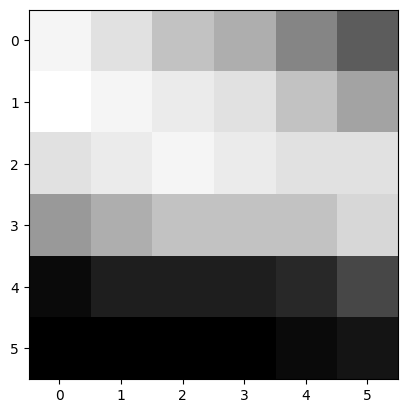

In [203]:
import cv2

# Load your image
_noisyImg = cv2.imread('36_image.jpg', cv2.IMREAD_COLOR)
_noisyImg = cv2.cvtColor(_noisyImg, cv2.COLOR_BGR2GRAY)
plt.imshow(_noisyImg, cmap = 'gray')
print(_noisyImg)
print(_noisyImg[0][1], _noisyImg[1][1],_noisyImg[1][0])

In [273]:
def merge_pieces(pieces, original_shape, blk_size):
    width, length = original_shape
    merged_image = np.zeros((width, length), dtype='uint8')
    distance = int(blk_size/2)
    index = 0
    for i in range(0, width):
        for j in range(0, length):
            merged_image[i, j] = pieces[index][distance, distance]
            index += 1
    return merged_image

In [282]:
test_image[147522]

array([[60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60],
       [60, 60, 60, 60, 60]], dtype=uint8)

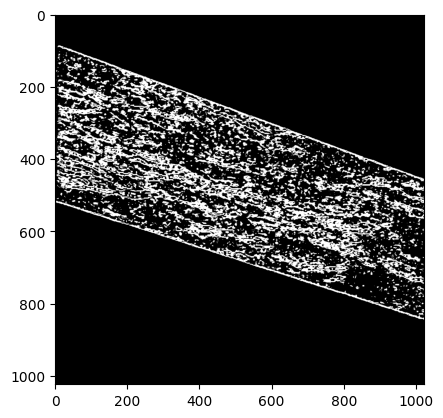

In [286]:
test_image = cut_and_process_image(new_image, 5)
#count = 0
for i in range(0,len(test_image)):
    if sum(sum(test_image[i])) < 10*60:
        test_image[i] = np.where(test_image[i] == 60, 0, test_image[i])
    else:
        #print(count, i[2,2])
        test_image[i] = np.where(test_image[i] == 0, 60, test_image[i])
  #  count = count+1
reconstructed_image = merge_pieces(test_image, new_image.shape, 5)
plt.imshow(reconstructed_image, cmap = 'gray')

In [289]:
import cv2
import numpy as np
edges = cv2.Canny(reconstructed_image, 30, 60, apertureSize=3)


In [292]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]  # 这里直接返回的是坐标，不用变换
    cv2.line(reconstructed_image, (x1, y1), (x2, y2), (0, 255,0), 2)
cv2.imshow('houghlinep', reconstructed_image)

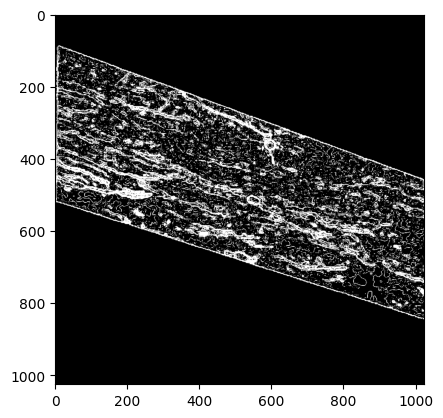

In [205]:
for i in range(0,width):
    for j in range(0, length):
        if test_image[i][j] == 0:
            if test_image[i][j+1] >0 & test_image[i+1][j+1] >0 & test_image[i+1][j] >0:
                print(i, j)
                test_image[i][j] = 60
plt.imshow(test_image, cmap = 'gray')            

In [187]:
len(new_image)

1024

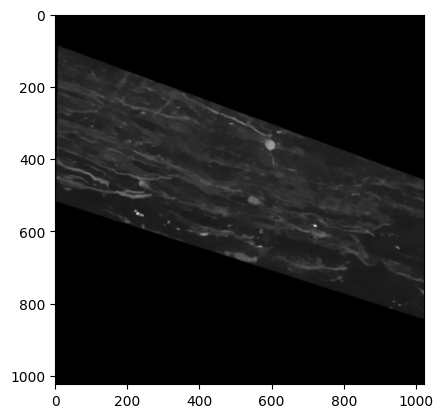

In [207]:
cv2.imwrite( "algo_try2.jpg",new_image)
plt.imshow(your_image, cmap = 'gray')

In [75]:
# the block should bigger than step

In [10]:
def init(img, _blk_size, _Beta_Kaiser):
    """该函数用于初始化，返回用于记录过滤后图像以及权重的数组,还有构造凯撒窗"""
    m_shape = img.shape
    m_img = numpy.matrix(numpy.zeros(m_shape, dtype=float))
    m_wight = numpy.matrix(numpy.zeros(m_shape, dtype=float))
    K = numpy.matrix(numpy.kaiser(_blk_size, _Beta_Kaiser))
    m_Kaiser = numpy.array(K.T * K)            # 构造一个凯撒窗
    return m_img, m_wight, m_Kaiser

In [32]:
_noisyImg.shape

(6, 6)

In [151]:
(width, height) = _noisyImg.shape   # 得到图像的长宽
block_Size = 3         # 块大小
blk_step = 1          # N块步长滑动
Width_num = (width - block_Size)/blk_step
Height_num = (height - block_Size)/blk_step

    # 初始化几个数组
Basic_img, m_Wight, m_Kaiser = init(_noisyImg, 4, 2)

In [152]:
print(Width_num, Height_num, Basic_img, 
      m_Wight, m_Kaiser)

3.0 3.0 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] [[0.19243688 0.40547457 0.40547457 0.19243688]
 [0.40547457 0.85435614 0.85435614 0.40547457]
 [0.40547457 0.85435614 0.85435614 0.40547457]
 [0.19243688 0.40547457 0.40547457 0.19243688]]


In [153]:
import numpy
def Locate_blk(i, j, blk_step, block_Size, width, height):
    """to make sure the location of block
        the function return the top-left pixel of blocks"""
    if i*blk_step+block_Size < width:
        point_x = i*blk_step
    else:
        point_x = width - block_Size

    if j*blk_step+block_Size < height:
        point_y = j*blk_step
    else:
        point_y = height - block_Size
    if point_x < 0 or point_y < 0:
        raise ValueError("Invalid block position: Point_x or Point_y is less than 0 (your block is bigger than your image)")        
    m_blockPoint = numpy.array((point_x, point_y), dtype=int)  # 当前参考图像的顶点

    return m_blockPoint

def Define_SearchWindow(_noisyImg, _BlockPoint, _WindowSize, Blk_Size):
    """该函数返回一个二元组（x,y）,用以界定_Search_Window顶点坐标"""
    point_x = _BlockPoint[0]  # 当前坐标
    point_y = _BlockPoint[1]  # 当前坐标

    # 获得SearchWindow四个顶点的坐标
    LX = point_x+Blk_Size/2-_WindowSize/2     # 左上x
    LY = point_y+Blk_Size/2-_WindowSize/2     # 左上y
    RX = LX+_WindowSize                       # 右下x
    RY = LY+_WindowSize                       # 右下y

    # 判断一下是否越界
    if LX < 0:   LX = 0
    elif RX > _noisyImg.shape[0]:   LX = _noisyImg.shape[0]-_WindowSize
    if LY < 0:   LY = 0
    elif RY > _noisyImg.shape[1]:   LY = _noisyImg.shape[1
                                                        ]-_WindowSize

    return numpy.array((LX, LY), dtype=int)


In [179]:
blk_positions =numpy.zeros((10, 6, 6), dtype=float)
blk_positions[10, :]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:

def Step1_fast_match(_noisyImg, _BlockPoint):
    """快速匹配"""
    '''
    *返回邻域内寻找和当前_block相似度最高的几个block,返回的数组中包含本身
    *_noisyImg:噪声图像
    *_BlockPoint:当前block的坐标及大小
    '''
    (present_x, present_y) = _BlockPoint  # 当前坐标
    Blk_Size = Step1_Blk_Size
    Search_Step = Step1_Search_Step
    Threshold = First_Match_threshold
    max_matched = Step1_max_matched_cnt
    Window_size = Step1_Search_Window

    blk_positions = numpy.zeros((max_matched, 2), dtype=int)  # 用于记录相似blk的位置
    Final_similar_blocks = numpy.zeros((max_matched, Blk_Size, Blk_Size), dtype=float)

    img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
    dct_img = cv2.dct(img.astype(numpy.float64))  # 对目标作block作二维余弦变换

    Final_similar_blocks[0, :, :] = dct_img
    blk_positions[0, :] = _BlockPoint

    Window_location = Define_SearchWindow(_noisyImg, _BlockPoint, Window_size, Blk_Size)
    blk_num = (Window_size-Blk_Size)/Search_Step  # 确定最多可以找到多少相似blk
    blk_num = int(blk_num)
    (present_x, present_y) = Window_location

    similar_blocks = numpy.zeros((blk_num**2, Blk_Size, Blk_Size), dtype=float)
    m_Blkpositions = numpy.zeros((blk_num**2, 2), dtype=int)
    Distances = numpy.zeros(blk_num**2, dtype=float)  # 记录各个blk与它的相似度

    # 开始在_Search_Window中搜索,初始版本先采用遍历搜索策略,这里返回最相似的几块
    matched_cnt = 0
    for i in range(blk_num):
        for j in range(blk_num):
            tem_img = _noisyImg[present_x: present_x+Blk_Size, present_y: present_y+Blk_Size]
            dct_Tem_img = cv2.dct(tem_img.astype(numpy.float64))
            m_Distance = numpy.linalg.norm((dct_img-dct_Tem_img))**2 / (Blk_Size**2)

            # 下面记录数据自动不考虑自身(因为已经记录)
            if m_Distance < Threshold and m_Distance > 0:  # 说明找到了一块符合要求的
                similar_blocks[matched_cnt, :, :] = dct_Tem_img
                m_Blkpositions[matched_cnt, :] = (present_x, present_y)
                Distances[matched_cnt] = m_Distance
                matched_cnt += 1
            present_y += Search_Step
        present_x += Search_Step
        present_y = Window_location[1]
    Distances = Distances[:matched_cnt]
    Sort = Distances.argsort()

    # 统计一下找到了多少相似的blk
    if matched_cnt < max_matched:
        Count = matched_cnt + 1
    else:
        Count = max_matched

    if Count > 0:
        for i in range(1, Count):
            Final_similar_blocks[i, :, :] = similar_blocks[Sort[i-1], :, :]
            blk_positions[i, :] = m_Blkpositions[Sort[i-1], :]
    return Final_similar_blocks, blk_positions, Count

In [172]:
 for i in range(int(Width_num+1)):
        for j in range(int(Height_num+1)):
            # m_blockPoint当前参考图像的顶点
            m_blockPoint = Locate_blk(i, j, blk_step, block_Size, width, height)       # 该函数用于保证当前的blk不超出图像范围
            #Similar_Blks, Positions, Count = Step1_fast_match(_noisyImg, m_blockPoint)
            print(m_blockPoint)
            

[0 0]
[0 1]
[0 2]
[0 3]
[1 0]
[1 1]
[1 2]
[1 3]
[2 0]
[2 1]
[2 2]
[2 3]
[3 0]
[3 1]
[3 2]
[3 3]


In [170]:
point_x = m_blockPoint[0]  # 当前坐标
point_y = m_blockPoint[1]  # 当前坐标
_WindowSize = 5
    # 获得SearchWindow四个顶点的坐标
LX = point_x+block_Size/2-_WindowSize/2     # 左上x
LY = point_y+block_Size/2-_WindowSize/2     # 左上y
RX = LX+_WindowSize                       # 右下x
RY = LY+_WindowSize 

print(LX,LY)

if LX < 0:   LX = 0
elif RX > _noisyImg.shape[0]:   LX = _noisyImg.shape[0]-_WindowSize
if LY < 0:   LY = 0
elif RY > _noisyImg.shape[1]:   LY = _noisyImg.shape[1]-_WindowSize

print(LX,LY, RX,RY)

-1.0 -1.0
0 0 4.0 4.0


In [171]:
m_blockPoint[0] = 0
m_blockPoint[1] = 0
Window_location = Define_SearchWindow(_noisyImg, m_blockPoint, _WindowSize, block_Size)
blk_num = (_WindowSize-block_Size)/blk_step  # 确定最多可以找到多少相似blk
int(blk_num)

2

In [1]:
import numpy as np
from scipy.stats import shapiro

def cut_and_process_image(image):
    # Step 1: Cut the 1024x1024 image into 6x6 pieces
    pieces = []
    for i in range(0, 1024, 8):
        for j in range(0, 1024, 8):
            piece = image[i:i+8, j:j+8]
            pieces.append(piece)

    # Step 2: Perform Shapiro-Wilk test and process pieces
    for piece in pieces:
        # Step 2a: Flatten the piece to perform the Shapiro-Wilk test
        flattened_piece = piece.flatten()

        # Step 2b: Perform the Shapiro-Wilk test
        _, p_value = shapiro(flattened_piece)

        # Step 3: If normal distribution, increase expression of top 5 pixels
        if p_value > 0.05 & p_value < 1.0:  # Adjust the threshold as needed
            # Sort the indices of the top 5 pixels
            if sum(_noisyImg.flatten()/len(_noisyImg)**2) > 30:
                top_indices = np.argsort(piece, axis=None)[-5:]

            # Increase the expression of the top 5 pixels to 150
                piece.flat[top_indices] = 150

    return pieces

def reconstruct_image(pieces):
    # Step 4: Reconstruct the pieces into a larger image
    reconstructed_image = np.zeros((1024, 1024))

    piece_index = 0
    for i in range(0, 1024, 8):
        for j in range(0, 1024, 8):
            piece = pieces[piece_index]
            reconstructed_image[i:i+8, j:j+8] = piece
            piece_index += 1

    return reconstructed_image

# Example usage:
# Assuming 'your_image' is your 1024x1024 grayscale image
# Make sure to replace 'your_image' with your actual image array
your_image = cv2.imread('Final3.jpg', cv2.IMREAD_COLOR)  # Replace this line with your actual image data

your_image = cv2.cvtColor(your_image, cv2.COLOR_BGR2GRAY)
processed_pieces = cut_and_process_image(your_image)


NameError: name 'cv2' is not defined

The input image is not grayscale. Converting to grayscale.


C:\Users\Ding-Yang\anaconda3\envs\intern\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


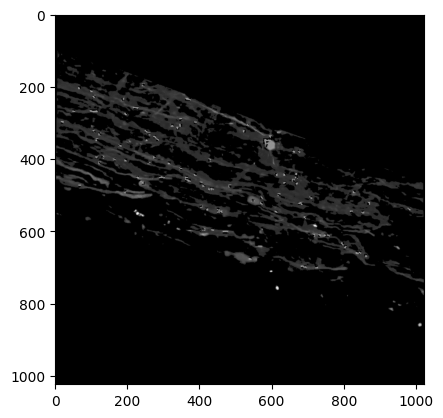

In [255]:
import numpy as np
import cv2
from scipy.stats import shapiro

def adjust_image(input_image, block_size):
    # Step 1: Ensure the image is a grayscale image
    if len(input_image.shape) == 3:
        print("The input image is not grayscale. Converting to grayscale.")
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Step 2: Cut the 1024x1024 image into N*N pixel images
    pieces = []
    for i in range(0, 1024, block_size):
        for j in range(0, 1024, block_size):
            piece = input_image[i:i+block_size, j:j+block_size]
            pieces.append(piece)

    count = 0
    # Step 3: Perform Shapiro-Wilk test and adjust pieces
    for piece in pieces:
        # Flatten the piece to perform the Shapiro-Wilk test
        flattened_piece = piece.flatten()

        # Perform the Shapiro-Wilk test
        _, p_value = shapiro(flattened_piece)

        # If p-value is between 0.05 and 1, increase expression of top 5 pixels
        if 0.05 < p_value < 1:
            mean_expression = np.mean(piece)
            piece[piece > mean_expression] = 150
            piece[piece <= mean_expression] = 0

    # Step 4: Merge all the small pieces into one image
    reconstructed_image = np.zeros((1024, 1024), dtype=np.uint8)

    piece_index = 0
    for i in range(0, 1024, block_size):
        for j in range(0, 1024, block_size):
            piece = pieces[piece_index]
            reconstructed_image[i:i+block_size, j:j+block_size] = piece
            piece_index += 1

    # Display the adjusted image
    plt.imshow( reconstructed_image,cmap = 'gray')
    cv2.imwrite( "try2.jpg",reconstructed_image)
# Example usage:
# Assuming 'your_image' is your 1024x1024 grayscale image
# Make sure to replace 'your_image' with your actual image array
your_image = cv2.imread('try1.jpg', cv2.IMREAD_COLOR)  # Replace this line with your actual image data
adjust_image(your_image, block_size=3)  # Change block_size as needed


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'img'


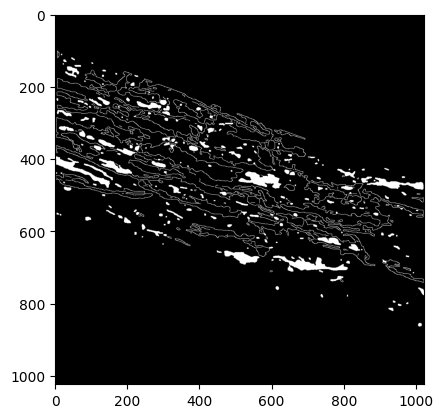

In [260]:
from skimage import feature
#your_image = cv2.cvtColor(your_image, cv2.COLOR_BGR2GRAY)
edges =  feature.canny(your_image / 255.)
import scipy as sp
fill_axon = sp.ndimage.binary_fill_holes(edges)
plt.imshow(fill_axon, cmap = 'gray')
cv2.imwrite( "try3.jpg",fill_axon)

Text(0.5, 1.0, 'Canny filter, $\\sigma=1$')

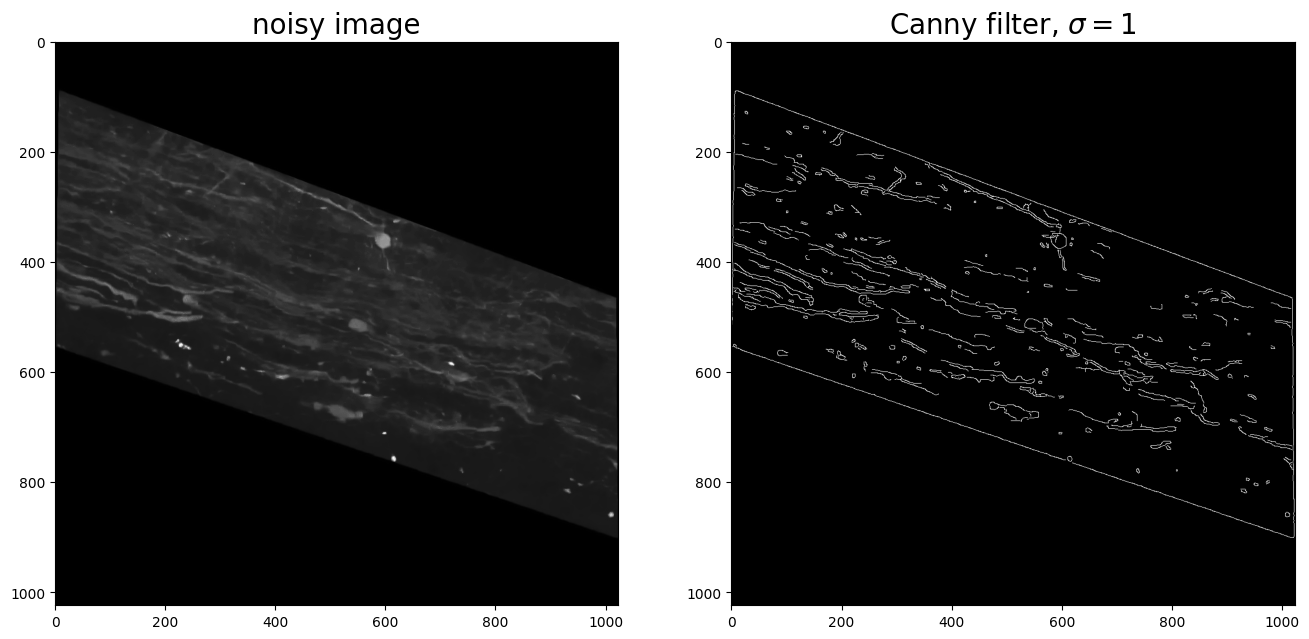

In [270]:
your_image = cv2.imread('denoised.jpg', cv2.IMREAD_COLOR)  # Replace this line with your actual image data
your_image = cv2.cvtColor(your_image, cv2.COLOR_BGR2GRAY)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(your_image, sigma=0.8)
edges2 = feature.canny(your_image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax[0].imshow(your_image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

#ax[2].imshow(edges2, cmap='gray')
#ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)


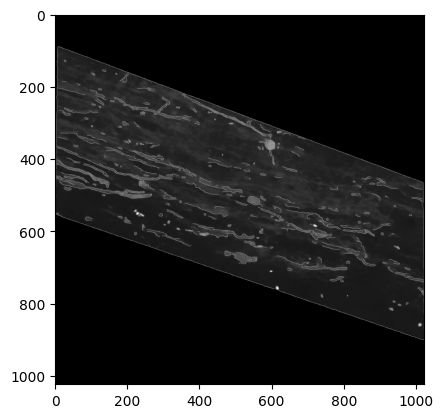

In [279]:
your_image = cv2.imread('denoised.jpg', cv2.IMREAD_COLOR)  # Replace this line with your actual image data
your_image = cv2.cvtColor(your_image, cv2.COLOR_BGR2GRAY)
edges1 = feature.canny(your_image, sigma=0.8)

for x in range(0, your_image.shape[0]):
    for y in range(0, your_image.shape[1]):
        if edges1[x][y] == True:
            your_image[x][y] = 150
plt.imshow(your_image,cmap = 'gray')

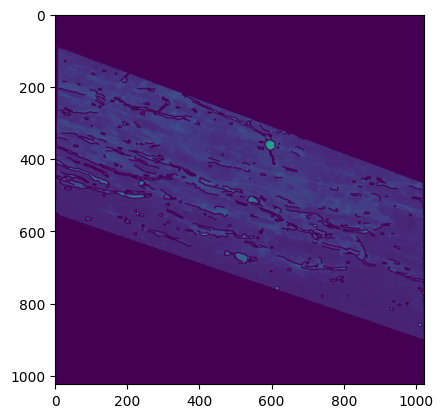

In [287]:
ret, binary_img = cv2.threshold(your_image, 90, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                       
# draw contours on the original image
image_copy = your_image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
plt.imshow( image_copy)

In [7]:
import subprocess

# Your image path
image_path = "./denoised.jpg"

# Call the capture_partial_image.py script with the image path
script_path = "draw_contour_with_canny.py"  # Replace with the actual path
result = subprocess.run(["python", script_path, "--image", image_path], capture_output=True, check=True, text=True)    
print(result.stdout)

**The input image is not grayscale. Converting to grayscale.**



In [ ]:
import subprocess

# Your image path
image_path = "./denoised.jpg"

# Call the capture_partial_image.py script with the image path
script_path = "contour.py"  # Replace with the actual path
result = subprocess.run(["python", script_path, "--image", image_path], capture_output=True, check=True, text=True)    
print(result.stdout)

Text(0.5, 1.0, 'guassian')

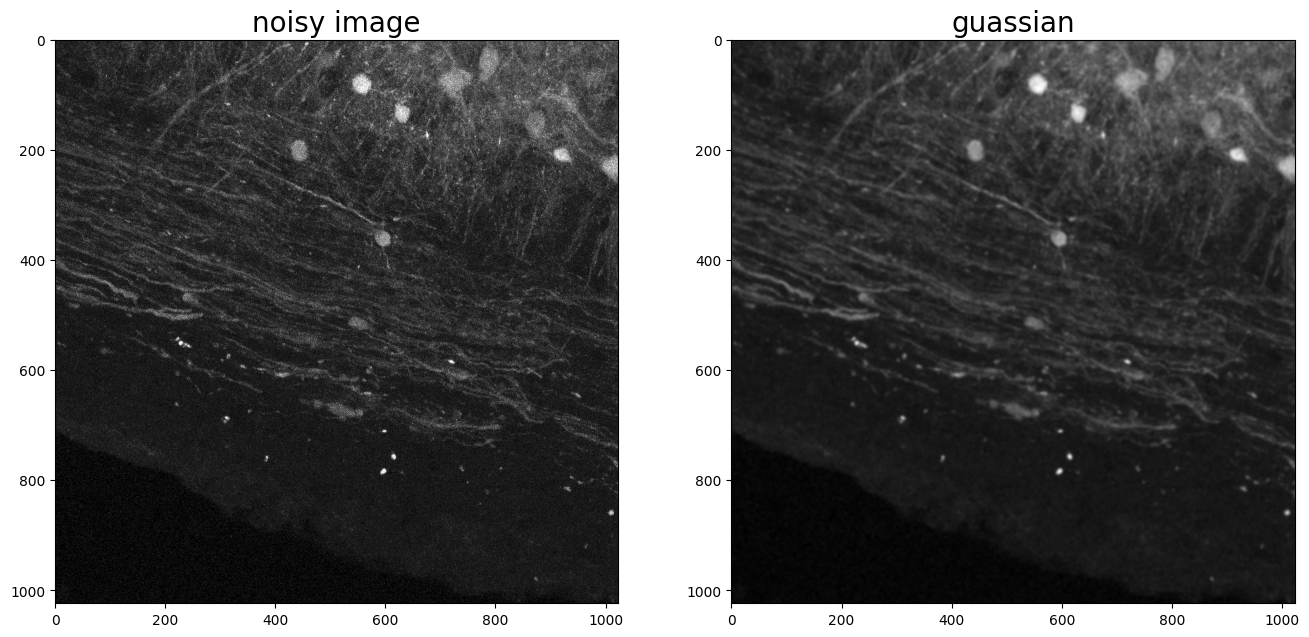

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
your_image = cv2.imread('integrated_image.jpg', cv2.IMREAD_COLOR)  # Replace this line with your actual image data
your_image = cv2.cvtColor(your_image, cv2.COLOR_BGR2GRAY)

Gau = cv2.GaussianBlur(your_image, (11,11), 0) #去除雜質
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax[0].imshow(your_image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(Gau, cmap='gray')
ax[1].set_title('guassian', fontsize=20)


SyntaxError: invalid syntax (979099250.py, line 2)